In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.23.1'

In [4]:
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 
            'phase', 'attributes']
df = pd.read_csv('Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip', 
                sep='\t', comment='#', low_memory=False,
                header=None, names=col_names)

In [8]:
df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11"
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601849 entries, 0 to 2601848
Data columns (total 9 columns):
seqid         object
source        object
type          object
start         int64
end           int64
score         object
strand        object
phase         object
attributes    object
dtypes: int64(2), object(7)
memory usage: 178.7+ MB


In [11]:
#From a high-level view, we have loaded the entire GFF3 file into 
#a DataFrame object in Python, and all of our following analysis 
#will be based on this single object.

In [14]:
df['seqid'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000008.2', 'GL000009.2', 'GL000194.1', 'GL000195.1',
       'GL000205.2', 'GL000208.1', 'GL000213.1', 'GL000214.1',
       'GL000216.2', 'GL000218.1', 'GL000219.1', 'GL000220.1',
       'GL000221.1', 'GL000224.1', 'GL000225.1', 'GL000226.1',
       'KI270302.1', 'KI270303.1', 'KI270304.1', 'KI270305.1',
       'KI270310.1', 'KI270311.1', 'KI270312.1', 'KI270315.1',
       'KI270316.1', 'KI270317.1', 'KI270320.1', 'KI270322.1',
       'KI270329.1', 'KI270330.1', 'KI270333.1', 'KI270334.1',
       'KI270335.1', 'KI270336.1', 'KI270337.1', 'KI270338.1',
       'KI270340.1', 'KI270362.1', 'KI270363.1', 'KI270364.1',
       'KI270366.1', 'KI270371.1', 'KI270372.1', 'KI270373.1',
       'KI270374.1', 'KI270375.1', 'KI270376.1', 'KI270378.1',
       'KI270379.1', 'KI270381.1', 'KI270382.1', 'KI270383.1',
       'KI270384.1', 'KI270385.1', 'KI270386

In [15]:
df['seqid'].unique().shape

(194,)

In [16]:
df['source'].value_counts()

havana            1441093
ensembl_havana    745065 
ensembl           228212 
.                 182510 
mirbase           4701   
GRCh38            194    
insdc             74     
Name: source, dtype: int64

In [17]:
#1. How much of the genome is incomplete?
gdf = df[df['source'] == 'GRCh38']
gdf.shape

(194, 9)

In [18]:
gdf.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
2513997,KI270756.1,GRCh38,supercontig,1,79590,.,.,.,"ID=supercontig:KI270756.1;Alias=chrUn_KI270756v1,NT_187511.1"
2511479,KI270371.1,GRCh38,supercontig,1,2805,.,.,.,"ID=supercontig:KI270371.1;Alias=chrUn_KI270371v1,NT_187494.1"
2513974,KI270754.1,GRCh38,supercontig,1,40191,.,.,.,"ID=supercontig:KI270754.1;Alias=chrUn_KI270754v1,NT_187509.1"
2511459,KI270311.1,GRCh38,supercontig,1,12399,.,.,.,"ID=supercontig:KI270311.1;Alias=chrUn_KI270311v1,NT_187406.1"
2511498,KI270392.1,GRCh38,supercontig,1,971,.,.,.,"ID=supercontig:KI270392.1;Alias=chrUn_KI270392v1,NT_187485.1"
2511554,KI270516.1,GRCh38,supercontig,1,1300,.,.,.,"ID=supercontig:KI270516.1;Alias=chrUn_KI270516v1,NT_187431.1"
2511508,KI270419.1,GRCh38,supercontig,1,1029,.,.,.,"ID=supercontig:KI270419.1;Alias=chrUn_KI270419v1,NT_187411.1"
1559144,20,GRCh38,chromosome,1,64444167,.,.,.,"ID=chromosome:20;Alias=CM000682.2,chr20,NC_000020.11"
2511492,KI270386.1,GRCh38,supercontig,1,1788,.,.,.,"ID=supercontig:KI270386.1;Alias=chrUn_KI270386v1,NT_187480.1"
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11"


In [19]:
gdf = gdf.copy() # to avoid SettingWithCopyWarning 
gdf['length'] = gdf['end'] - gdf['start'] + 1
gdf.head()

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11",248956422
235068,10,GRCh38,chromosome,1,133797422,.,.,.,"ID=chromosome:10;Alias=CM000672.2,chr10,NC_000010.11",133797422
328938,11,GRCh38,chromosome,1,135086622,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000011.10",135086622
483370,12,GRCh38,chromosome,1,133275309,.,.,.,"ID=chromosome:12;Alias=CM000674.2,chr12,NC_000012.12",133275309
634486,13,GRCh38,chromosome,1,114364328,.,.,.,"ID=chromosome:13;Alias=CM000675.2,chr13,NC_000013.11",114364328


In [20]:
gdf.length.sum()

3096629726

In [31]:
chrs = [str(_) for _ in range(1, 23)] + ['X', 'Y', 'MT']
gdf[-gdf['seqid'].isin(chrs)].length.sum() / gdf.length.sum()
#gdf[(gdf['type'] == 'supercontig')].length.sum() / gdf.length.sum()

0.0037021917421198327

In [32]:
#2. How many genes are there?
edf = df[df['source'].isin(['ensembl', 'havana', 'ensembl_havana'])]
edf.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
1014325,17,havana,five_prime_UTR,7676521,7676619,.,-,.,Parent=transcript:ENST00000619485
267307,10,ensembl,CDS,50813857,50814038,.,-,2,ID=CDS:ENSP00000282641;Parent=transcript:ENST00000282641;protein_id=ENSP00000282641
1567439,20,havana,exon,8305686,8305933,.,+,.,Parent=transcript:ENST00000635830;Name=ENSE00003798028;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00003798028;rank=1;version=1
2532911,X,ensembl,exon,44873177,44873712,.,+,.,Parent=transcript:ENST00000382899;Name=ENSE00002205844;constitutive=0;ensembl_end_phase=2;ensembl_phase=-1;exon_id=ENSE00002205844;rank=1;version=2
2039302,5,havana,exon,139322598,139322967,.,+,.,Parent=transcript:ENST00000510056;Name=ENSE00003768022;constitutive=0;ensembl_end_phase=0;ensembl_phase=2;exon_id=ENSE00003768022;rank=12;version=1
171131,1,ensembl_havana,transcript,161314388,161362433,.,+,.,ID=transcript:ENST00000392169;Parent=gene:ENSG00000143252;Name=SDHC-006;biotype=protein_coding;ccdsid=CCDS41432.1;havana_transcript=OTTHUMT00000359063;havana_version=2;tag=basic;transcript_id=ENST00000392169;transcript_support_level=1;version=6
2178948,6,ensembl_havana,exon,143426989,143428506,.,-,.,Parent=transcript:ENST00000237283;Name=ENSE00001939945;constitutive=0;ensembl_end_phase=-1;ensembl_phase=1;exon_id=ENSE00001939945;rank=6;version=1
2022972,5,ensembl,CDS,122400986,122401126,.,+,0,ID=CDS:ENSP00000441681;Parent=transcript:ENST00000542191;protein_id=ENSP00000441681
2479885,9,havana,exon,125330078,125330218,.,+,.,Parent=transcript:ENST00000394105;Name=ENSE00001370988;constitutive=0;ensembl_end_phase=1;ensembl_phase=1;exon_id=ENSE00001370988;rank=11;version=1
359368,11,havana,exon,17613612,17613701,.,+,.,Parent=transcript:ENST00000342528;Name=ENSE00001382176;constitutive=0;ensembl_end_phase=0;ensembl_phase=0;exon_id=ENSE00001382176;rank=15;version=1


In [35]:
edf['type'].value_counts()

exon                             1180596
CDS                              704604 
five_prime_UTR                   142387 
three_prime_UTR                  133938 
transcript                       96375  
gene                             42470  
processed_transcript             28228  
aberrant_processed_transcript    26944  
NMD_transcript_variant           13761  
lincRNA                          13247  
processed_pseudogene             10722  
lincRNA_gene                     7533   
pseudogene                       3049   
RNA                              2221   
snRNA_gene                       1909   
snRNA                            1909   
snoRNA                           956    
snoRNA_gene                      944    
pseudogenic_transcript           737    
rRNA_gene                        549    
rRNA                             549    
miRNA                            302    
V_gene_segment                   216    
J_gene_segment                   158    
VD_gene_segment 

In [38]:
ndf = edf[edf['type'] == 'gene']
ndf = ndf.copy()
ndf.sample(10)['attributes'].values

array(['ID=gene:ENSG00000188399;Name=ANKRD36P1;biotype=unprocessed_pseudogene;description=ankyrin repeat domain 36 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:37759];gene_id=ENSG00000188399;havana_gene=OTTHUMG00000036761;havana_version=1;logic_name=havana;version=5',
       'ID=gene:ENSG00000141127;Name=PRPSAP2;biotype=protein_coding;description=phosphoribosyl pyrophosphate synthetase associated protein 2 [Source:HGNC Symbol%3BAcc:HGNC:9467];gene_id=ENSG00000141127;havana_gene=OTTHUMG00000059406;havana_version=7;logic_name=ensembl_havana_gene;version=14',
       'ID=gene:ENSG00000225264;Name=ZNRF2P2;biotype=transcribed_processed_pseudogene;description=zinc and ring finger 2 pseudogene 2 [Source:HGNC Symbol%3BAcc:HGNC:42793];gene_id=ENSG00000225264;havana_gene=OTTHUMG00000152750;havana_version=1;logic_name=havana;version=3',
       'ID=gene:ENSG00000235248;Name=OR13C1P;biotype=unprocessed_pseudogene;description=olfactory receptor family 13 subfamily C member 1 pseudogene [Source:HGNC Sy

In [39]:
# They are formatted as semicolon-separated list of tag-value pairs. 
# The information we are most interested in is gene name, gene ID 
# and description, and we will extract them with regular expression (regex).
import re

RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);')
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    return res.group('gene_name')

ndf['gene_name'] = ndf['attributes'].apply(extract_gene_name)

In [40]:
# Gene IDs and description are extracted in a similar way.
RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
def extract_gene_id(attributes_str):
    res = RE_GENE_ID.search(attributes_str)
    return res.group('gene_id')

ndf['gene_id'] = ndf.attributes.apply(extract_gene_id)


RE_DESC = re.compile('description=(?P<desc>.+?);')
def extract_description(attributes_str):
    res = RE_DESC.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('desc')


ndf['desc'] = ndf.attributes.apply(extract_description)

In [41]:
ndf.drop('attributes', axis=1, inplace=True)

In [42]:
ndf.head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc
16,1,havana,gene,11869,14409,.,+,.,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Symbol%3BAcc:HGNC:37102]
28,1,havana,gene,14404,29570,.,-,.,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38034]
71,1,havana,gene,52473,53312,.,+,.,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member 4 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:14822]
74,1,havana,gene,62948,63887,.,+,.,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member 11 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:31276]
77,1,ensembl_havana,gene,69091,70008,.,+,.,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member 5 [Source:HGNC Symbol%3BAcc:HGNC:14825]


In [44]:
ndf.shape

(42470, 11)

In [45]:
ndf['gene_id'].unique().shape

(42470,)

In [46]:
ndf['gene_name'].unique().shape

(42387,)

In [50]:
count_df = ndf.groupby('gene_name').count().iloc[:, 0].sort_values().iloc[::-1]
count_df.head(10)

gene_name
SCARNA20           7
SCARNA16           6
SCARNA17           5
SCARNA15           4
SCARNA21           4
SCARNA11           4
Clostridiales-1    3
SCARNA4            3
C1QTNF9B-AS1       2
C11orf71           2
Name: seqid, dtype: int64

In [51]:
count_df[count_df > 1].shape

(63,)

In [52]:
count_df.shape

(42387,)

In [53]:
count_df[count_df > 1].shape[0] / count_df.shape[0]

0.0014863047632528842

In [54]:
ndf[ndf.gene_name == 'SCARNA20']

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc
179399,1,ensembl,gene,171768070,171768175,.,+,.,SCARNA20,ENSG00000253060,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
201037,1,ensembl,gene,204727991,204728106,.,+,.,SCARNA20,ENSG00000251861,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
349203,11,ensembl,gene,8555016,8555146,.,+,.,SCARNA20,ENSG00000252778,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
718520,14,ensembl,gene,63479272,63479413,.,+,.,SCARNA20,ENSG00000252800,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
837233,15,ensembl,gene,75121536,75121666,.,-,.,SCARNA20,ENSG00000252722,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
1039874,17,ensembl,gene,28018770,28018907,.,+,.,SCARNA20,ENSG00000251818,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
1108215,17,ensembl,gene,60231516,60231646,.,-,.,SCARNA20,ENSG00000252577,small Cajal body-specific RNA 20 [Source:HGNC Symbol%3BAcc:HGNC:32578]


In [55]:
# How long is a typical gene?
ndf['length'] = ndf.end - ndf.start + 1
ndf.length.describe()

count    4.247000e+04
mean     3.583348e+04
std      9.683485e+04
min      8.000000e+00
25%      8.840000e+02
50%      5.170500e+03
75%      3.055200e+04
max      2.304997e+06
Name: length, dtype: float64

In [58]:
import matplotlib as plt

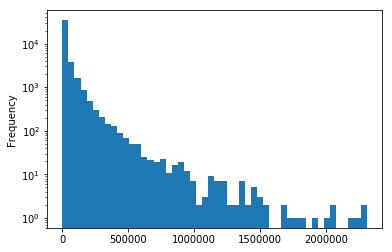

In [60]:
ndf.length.plot(kind='hist', bins=50, logy=True)

In [62]:
ndf[ndf.length > 2e6].sort_values('length').iloc[::-1]

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc,length
2309345,7,ensembl_havana,gene,146116002,148420998,.,+,.,CNTNAP2,ENSG00000174469,contactin associated protein-like 2 [Source:HGNC Symbol%3BAcc:HGNC:13830],2304997
2422510,9,ensembl_havana,gene,8314246,10612723,.,-,.,PTPRD,ENSG00000153707,protein tyrosine phosphatase%2C receptor type D [Source:HGNC Symbol%3BAcc:HGNC:9668],2298478
2527169,X,ensembl_havana,gene,31097677,33339441,.,-,.,DMD,ENSG00000198947,dystrophin [Source:HGNC Symbol%3BAcc:HGNC:2928],2241765
440886,11,ensembl_havana,gene,83455012,85627922,.,-,.,DLG2,ENSG00000150672,discs large MAGUK scaffold protein 2 [Source:HGNC Symbol%3BAcc:HGNC:2901],2172911
2323457,8,ensembl_havana,gene,2935353,4994972,.,-,.,CSMD1,ENSG00000183117,CUB and Sushi multiple domains 1 [Source:HGNC Symbol%3BAcc:HGNC:14026],2059620
1569914,20,ensembl_havana,gene,13995369,16053197,.,+,.,MACROD2,ENSG00000172264,MACRO domain containing 2 [Source:HGNC Symbol%3BAcc:HGNC:16126],2057829


In [63]:
ndf.sort_values('length').head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc,length
682278,14,havana,gene,22438547,22438554,.,+,.,TRDD1,ENSG00000223997,T cell receptor delta diversity 1 [Source:HGNC Symbol%3BAcc:HGNC:12254],8
682282,14,havana,gene,22439007,22439015,.,+,.,TRDD2,ENSG00000237235,T cell receptor delta diversity 2 [Source:HGNC Symbol%3BAcc:HGNC:12255],9
2306836,7,havana,gene,142786213,142786224,.,+,.,TRBD1,ENSG00000282431,T cell receptor beta diversity 1 [Source:HGNC Symbol%3BAcc:HGNC:12158],12
682286,14,havana,gene,22449113,22449125,.,+,.,TRDD3,ENSG00000228985,T cell receptor delta diversity 3 [Source:HGNC Symbol%3BAcc:HGNC:12256],13
1879625,4,havana,gene,10238213,10238235,.,-,.,AC006499.9,ENSG00000271544,,23


In [66]:
# Gene distribution among chromosomes
ndf = ndf[ndf['seqid'].isin(chrs)]
chr_gene_counts = ndf.groupby('seqid').count().iloc[:, 0].sort_values().iloc[::-1]
chr_gene_counts

seqid
1     3902
2     2806
11    2561
19    2412
17    2280
3     2204
6     2154
12    2140
7     2106
5     2002
16    1881
X     1852
4     1751
9     1659
8     1628
10    1600
15    1476
14    1449
22    996 
20    965 
13    872 
18    766 
21    541 
Y     436 
Name: source, dtype: int64

In [67]:
df[(df.type == 'gene') & (df.seqid == 'MT')]

,seqid,source,type,start,end,score,strand,phase,attributes
2514003,MT,insdc,gene,648,1601,.,+,.,ID=gene:ENSG00000211459;Name=MT-RNR1;biotype=Mt_rRNA;description=mitochondrially encoded 12S RNA [Source:HGNC Symbol%3BAcc:HGNC:7470];gene_id=ENSG00000211459;logic_name=mt_genbank_import;version=2
2514009,MT,insdc,gene,1671,3229,.,+,.,ID=gene:ENSG00000210082;Name=MT-RNR2;biotype=Mt_rRNA;description=mitochondrially encoded 16S RNA [Source:HGNC Symbol%3BAcc:HGNC:7471];gene_id=ENSG00000210082;logic_name=mt_genbank_import;version=2
2514016,MT,insdc,gene,3307,4262,.,+,.,ID=gene:ENSG00000198888;Name=MT-ND1;biotype=protein_coding;description=mitochondrially encoded NADH:ubiquinone oxidoreductase core subunit 1 [Source:HGNC Symbol%3BAcc:HGNC:7455];gene_id=ENSG00000198888;logic_name=mt_genbank_import;version=2
2514029,MT,insdc,gene,4470,5511,.,+,.,ID=gene:ENSG00000198763;Name=MT-ND2;biotype=protein_coding;description=mitochondrially encoded NADH:ubiquinone oxidoreductase core subunit 2 [Source:HGNC Symbol%3BAcc:HGNC:7456];gene_id=ENSG00000198763;logic_name=mt_genbank_import;version=3
2514048,MT,insdc,gene,5904,7445,.,+,.,ID=gene:ENSG00000198804;Name=MT-CO1;biotype=protein_coding;description=mitochondrially encoded cytochrome c oxidase I [Source:HGNC Symbol%3BAcc:HGNC:7419];gene_id=ENSG00000198804;logic_name=mt_genbank_import;version=2
2514058,MT,insdc,gene,7586,8269,.,+,.,ID=gene:ENSG00000198712;Name=MT-CO2;biotype=protein_coding;description=mitochondrially encoded cytochrome c oxidase II [Source:HGNC Symbol%3BAcc:HGNC:7421];gene_id=ENSG00000198712;logic_name=mt_genbank_import;version=1
2514065,MT,insdc,gene,8366,8572,.,+,.,ID=gene:ENSG00000228253;Name=MT-ATP8;biotype=protein_coding;description=mitochondrially encoded ATP synthase 8 [Source:HGNC Symbol%3BAcc:HGNC:7415];gene_id=ENSG00000228253;logic_name=mt_genbank_import;version=1
2514069,MT,insdc,gene,8527,9207,.,+,.,ID=gene:ENSG00000198899;Name=MT-ATP6;biotype=protein_coding;description=mitochondrially encoded ATP synthase 6 [Source:HGNC Symbol%3BAcc:HGNC:7414];gene_id=ENSG00000198899;logic_name=mt_genbank_import;version=2
2514073,MT,insdc,gene,9207,9990,.,+,.,ID=gene:ENSG00000198938;Name=MT-CO3;biotype=protein_coding;description=mitochondrially encoded cytochrome c oxidase III [Source:HGNC Symbol%3BAcc:HGNC:7422];gene_id=ENSG00000198938;logic_name=mt_genbank_import;version=2
2514080,MT,insdc,gene,10059,10404,.,+,.,ID=gene:ENSG00000198840;Name=MT-ND3;biotype=protein_coding;description=mitochondrially encoded NADH:ubiquinone oxidoreductase core subunit 3 [Source:HGNC Symbol%3BAcc:HGNC:7458];gene_id=ENSG00000198840;logic_name=mt_genbank_import;version=2


In [68]:
gdf = gdf[gdf.seqid.isin(chrs)]
gdf.drop(['start', 'end', 'score', 'strand', 'phase' ,'attributes'], axis=1, inplace=True)
gdf.sort_values('length').iloc[::-1]

,seqid,source,type,length
0,1,GRCh38,chromosome,248956422
1364641,2,GRCh38,chromosome,242193529
1705855,3,GRCh38,chromosome,198295559
1864567,4,GRCh38,chromosome,190214555
1964921,5,GRCh38,chromosome,181538259
2080148,6,GRCh38,chromosome,170805979
2196981,7,GRCh38,chromosome,159345973
2514125,X,GRCh38,chromosome,156040895
2321361,8,GRCh38,chromosome,145138636
2416560,9,GRCh38,chromosome,138394717


In [70]:
cdf = chr_gene_counts.to_frame(name='gene_count').reset_index()
cdf.head(2)

,seqid,gene_count
0,1,3902
1,2,2806


In [71]:
merged = gdf.merge(cdf, on='seqid')
merged

,seqid,source,type,length,gene_count
0,1,GRCh38,chromosome,248956422,3902
1,10,GRCh38,chromosome,133797422,1600
2,11,GRCh38,chromosome,135086622,2561
3,12,GRCh38,chromosome,133275309,2140
4,13,GRCh38,chromosome,114364328,872
5,14,GRCh38,chromosome,107043718,1449
6,15,GRCh38,chromosome,101991189,1476
7,16,GRCh38,chromosome,90338345,1881
8,17,GRCh38,chromosome,83257441,2280
9,18,GRCh38,chromosome,80373285,766


In [72]:
merged[['length', 'gene_count']].corr()

,length,gene_count
length,1.000000,0.728221
gene_count,0.728221,1.000000


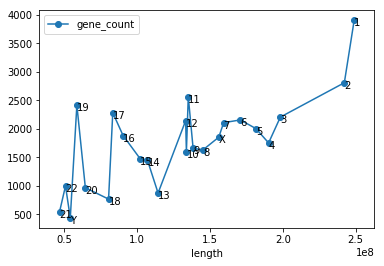

In [73]:
ax = merged[['length', 'gene_count']].sort_values('length').plot(x='length', y='gene_count', style='o-')
# add some margin to both ends of x axis
xlim = ax.get_xlim()
margin = xlim[0] * 0.1
ax.set_xlim([xlim[0] - margin, xlim[1] + margin])
# Label each point on the graph
for (s, x, y) in merged[['seqid', 'length', 'gene_count']].sort_values('length').values:
    ax.text(x, y - 100, str(s))

In [ ]:
# The GFF3 file is very rich in annotation information, and we have just scratched the surface. 
# If you are interested in further exploration, here are a few questions you can play with:

# How many transcripts does a gene typically have? What percentage of genes have more than 1 transcript?
# How many isoforms does a transcript typically have?
# How many exons, CDS, and UTRs does a transcript typically have? What sizes are they?
# Is it possible to categorize the genes based on their function as described in the description column?